In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
from sklearn.utils import check_random_state

import wfdb

In [26]:
allData = []
label = [];

for i in range(45):

    index = '{:03}'.format(i)
    fileName = 'LabWalks/co' + index + '_base'
    if os.path.isfile(fileName + '.hea'):
        record = wfdb.rdrecord(fileName)
        data = record.p_signal
        tmp = np.linalg.norm(data[:,0:3],axis=1)
        #print(np.size(tmp))
        allData.append(tmp)
        label.append(0)
    
    index = '{:03}'.format(i)
    fileName = 'LabWalks/fl' + index + '_base'
    if os.path.isfile(fileName + '.hea'):
        record = wfdb.rdrecord(fileName)
        data = record.p_signal
        tmp = np.linalg.norm(data[:,0:3],axis=1)
        #print(np.size(tmp))
        allData.append(tmp)
        label.append(1)

print(len(allData))
print(len(label))


73
73


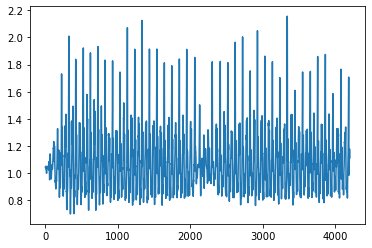

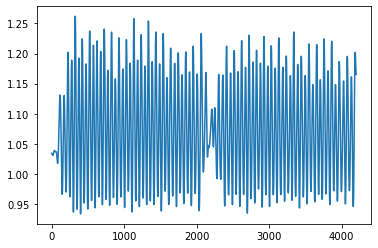

In [24]:
plt.plot(allData[3])
plt.figure()
a = gaussian_filter(allData[3], sigma = 10)
plt.plot(a)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, metrics
import datetime as dt

X_train, X_test, y_train, y_test = train_test_split(
    allData, label, test_size=0.2,random_state=42)

print(y_train)

[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]


(5014, 1000) (5014,)


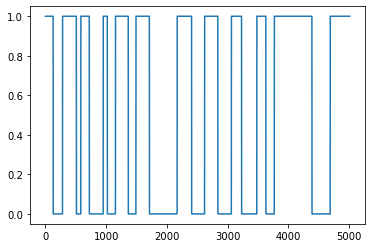

In [52]:
SkipedCycles = 3
NumOfCycles = 40
NumOfSamples = 1000

X_t = []
y_t = []

alldata = X_train
numItems = -1
for one in alldata:
    numItems = numItems + 1;
    pdata = one - 1
    scaler = np.sort(pdata)[int(len(pdata)*0.98)]
    scaledData = pdata / scaler
    filterdData = gaussian_filter(scaledData, sigma = 20)

    index = 0
    #plt.figure()
    for i in range(SkipedCycles):
        while index + 1 < len(one):
            index = index + 1
            if filterdData[index] > max(filterdData[index-1], filterdData[index+1]):
                break;
    index = index + 1;
    while index + 1 < len(one):
        startIndex = index
        #print(startIndex)
        while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
            index = index + 1
        index = index + 1
        endIndex = index  
        #print(endIndex)

        if endIndex < len(one) - 1:
            usedData = scaledData[startIndex: endIndex]
            f = interp1d(range(len(usedData)), usedData, kind='cubic')
            x = np.linspace(0, len(usedData)-1, num=NumOfSamples, endpoint=False)
            processedData = f(x)
            #plt.plot(processedData)
            X_t.append(processedData)
            y_t.append(y_train[numItems]) 

print(np.shape(X_t), np.shape(y_t))
plt.plot(y_t)

(1188, 1000) (1188,)


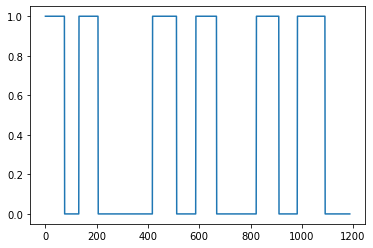

In [55]:
SkipedCycles = 3
NumOfCycles = 40
NumOfSamples = 1000

X_ts = []
y_ts = []

alldata = X_test
numItems = -1
for one in alldata:
    numItems = numItems + 1;
    pdata = one - 1
    scaler = np.sort(pdata)[int(len(pdata)*0.98)]
    scaledData = pdata / scaler
    filterdData = gaussian_filter(scaledData, sigma = 20)

    index = 0
    #plt.figure()
    for i in range(SkipedCycles):
        while index + 1 < len(one):
            index = index + 1
            if filterdData[index] > max(filterdData[index-1], filterdData[index+1]):
                break;
    index = index + 1;
    while index + 1 < len(one):
        startIndex = index
        #print(startIndex)
        while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
            index = index + 1
        index = index + 1
        endIndex = index  
        #print(endIndex)

        if endIndex < len(one) - 1:
            usedData = scaledData[startIndex: endIndex]
            f = interp1d(range(len(usedData)), usedData, kind='cubic')
            x = np.linspace(0, len(usedData)-1, num=NumOfSamples, endpoint=False)
            processedData = f(x)
            #plt.plot(processedData)
            X_ts.append(processedData)
            y_ts.append(y_test[numItems]) 

print(np.shape(X_ts), np.shape(y_ts))
plt.plot(y_ts)

(5014, 1000) (5014,)
(1188, 1000) (1188,)


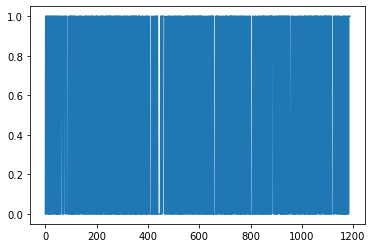

In [58]:
random_state = check_random_state(0)
permutation = random_state.permutation(np.array(X_t).shape[0])
X_tf = np.array(X_t)[permutation]
y_tf = np.array(y_t)[permutation]

permutation = random_state.permutation(np.array(X_ts).shape[0])
X_tsf = np.array(X_ts)[permutation]
y_tsf = np.array(y_ts)[permutation]

print(np.shape(X_tf), np.shape(y_tf))
print(np.shape(X_tsf), np.shape(y_tsf))
plt.plot(y_tsf)

In [73]:
param_C = 1
param_gamma = 0.1

classifier = svm.SVC(C=param_C,gamma=param_gamma,tol=0.001)
#classifier = svm.LinearSVC(C=param_C)

#We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_tf, y_tf)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

expected = y_tsf
predicted = classifier.predict(X_tsf)
print(expected)
print(predicted)

      
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))



Start learning at 2019-10-31 17:12:24.739943
Stop learning 2019-10-31 17:12:51.145600
Elapsed learning 0:00:26.405657
[0 1 1 ... 1 1 1]
[1 1 1 ... 0 1 1]
Confusion matrix:
[[333 334]
 [196 325]]
Accuracy=0.5538720538720538


In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=1)
decision_tree = decision_tree.fit(X_tf, y_tf)
r = export_text(decision_tree)

expected = y_tsf
predicted = decision_tree.predict(X_tsf)
print(expected)
print(predicted)

cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))



[0 1 1 ... 1 1 1]
[0 0 0 ... 0 1 0]
Confusion matrix:
[[549 118]
 [428  93]]
Accuracy=0.5404040404040404


In [94]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_tf, y_tf)

expected = y_tsf
predicted = rnd_clf.predict(X_tsf)
print(expected)
print(predicted)

cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))



[0 1 1 ... 1 1 1]
[0 1 1 ... 0 1 0]
Confusion matrix:
[[433 234]
 [255 266]]
Accuracy=0.5883838383838383
